# JSC270 - Class \#4

## Prof. Chevalier

### 27 Jan. 2020


# Today's Class

- Lab 3 debrief
- Polls, Surveys and Forms
- Data Simulations

<img src="img/okcupid-book.jpg" width="30%" align="left"/>
<img src="img/keystroke1.png" width="60%" align="right"/>

In the chart, the message A took 76minutes to author (source: dataclysm book)

<img src="img/okcupid-book.jpg" width="30%" align="left"/>
<img src="img/keystroke2.png" width="60%" align="right"/>

# Exploratory Data Analysis

> "To show \[a certain\] finding, we'll have to go on a short mathematical journey. These kinds of exercises are
what make data science work. To put together puzzles, you have to lay out all the pieces and then just start trying things. In the absence of careful sifting, reduction, and parsimony, **very little just “jumps out at you from terabytes of raw data.**" 

<center>— Christian Rudder, *Dataclysm*</center>

In [1]:
## Gather the okcupid profiles

#!wget https://github.com/rudeboybert/JSE_OkCupid/raw/master/profiles.csv.zip
#!unzip profiles.csv
#!mkdir data
#!mv profiles.csv data/

--2020-01-27 11:38:29--  https://github.com/rudeboybert/JSE_OkCupid/raw/master/profiles.csv.zip
Resolving github.com (github.com)... 192.30.253.113
Connecting to github.com (github.com)|192.30.253.113|:443... connected.
HTTP request sent, awaiting response... 302 Found
Location: https://raw.githubusercontent.com/rudeboybert/JSE_OkCupid/master/profiles.csv.zip [following]
--2020-01-27 11:38:30--  https://raw.githubusercontent.com/rudeboybert/JSE_OkCupid/master/profiles.csv.zip
Resolving raw.githubusercontent.com (raw.githubusercontent.com)... 151.101.124.133
Connecting to raw.githubusercontent.com (raw.githubusercontent.com)|151.101.124.133|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 56227692 (54M) [application/zip]
Saving to: ‘profiles.csv.zip.1’

profiles.csv.zip.1  100%[===================>]  53.62M  5.46MB/s    in 10s     

2020-01-27 11:38:40 (5.33 MB/s) - ‘profiles.csv.zip.1’ saved [56227692/56227692]

Archive:  profiles.csv.zip
  inflating: profiles.

In [2]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import numpy as np

df = pd.read_csv('data/profiles.csv')    ## Load the data
df.columns                               ## Show all columns

Index(['age', 'body_type', 'diet', 'drinks', 'drugs', 'education', 'essay0',
       'essay1', 'essay2', 'essay3', 'essay4', 'essay5', 'essay6', 'essay7',
       'essay8', 'essay9', 'ethnicity', 'height', 'income', 'job',
       'last_online', 'location', 'offspring', 'orientation', 'pets',
       'religion', 'sex', 'sign', 'smokes', 'speaks', 'status'],
      dtype='object')

In [32]:
np.sort(df.age.unique())

array([ 18,  19,  20,  21,  22,  23,  24,  25,  26,  27,  28,  29,  30,
        31,  32,  33,  34,  35,  36,  37,  38,  39,  40,  41,  42,  43,
        44,  45,  46,  47,  48,  49,  50,  51,  52,  53,  54,  55,  56,
        57,  58,  59,  60,  61,  62,  63,  64,  65,  66,  67,  68,  69,
       109, 110])

In [4]:
np.sort(df.age.unique())

array([ 18,  19,  20,  21,  22,  23,  24,  25,  26,  27,  28,  29,  30,
        31,  32,  33,  34,  35,  36,  37,  38,  39,  40,  41,  42,  43,
        44,  45,  46,  47,  48,  49,  50,  51,  52,  53,  54,  55,  56,
        57,  58,  59,  60,  61,  62,  63,  64,  65,  66,  67,  68,  69,
       109, 110])

In [27]:
df[df.age > 100]

age body_type          diet drinks  drugs                   education  \
2512   110       NaN           NaN    NaN    NaN                         NaN   
25324  109  athletic  mostly other    NaN  never  working on masters program   

      essay0 essay1 essay2   essay3  ...                   location  \
2512     NaN    NaN    NaN      NaN  ...      daly city, california   
25324    NaN    NaN    NaN  nothing  ...  san francisco, california   

             offspring orientation pets                             religion  \
2512               NaN    straight  NaN                                  NaN   
25324  might want kids    straight  NaN  other and somewhat serious about it   

      sex                                  sign         smokes  \
2512    f                                   NaN            NaN   
25324   m  aquarius but it doesn&rsquo;t matter  when drinking   

               speaks     status  
2512          english     single  
25324  english (okay)  available  

[2 rows x 31 columns]

<center><img src="img/calvin.png"></img></center>

## Ethnicity

In [6]:
df.ethnicity.unique()

array(['asian, white', 'white', nan, 'asian, black, other',
       'white, other', 'hispanic / latin, white', 'hispanic / latin',
       'pacific islander, white', 'asian', 'black, white',
       'pacific islander', 'asian, native american',
       'asian, pacific islander', 'black, native american, white',
       'middle eastern, other', 'native american, white', 'indian',
       'black', 'black, native american, hispanic / latin, other',
       'black, native american, hispanic / latin',
       'asian, black, pacific islander',
       'asian, middle eastern, black, native american, indian, pacific islander, hispanic / latin, white, other',
       'other', 'hispanic / latin, other', 'asian, black',
       'middle eastern, white', 'native american, white, other',
       'black, native american', 'black, white, other',
       'hispanic / latin, white, other', 'middle eastern', 'black, other',
       'native american, hispanic / latin, white', 'black, indian',
       'indian, white, othe

In [7]:
df.ethnicity.value_counts()[:10]

white                      32831
asian                       6134
hispanic / latin            2823
black                       2008
other                       1706
hispanic / latin, white     1301
indian                      1077
asian, white                 811
white, other                 641
pacific islander             432
Name: ethnicity, dtype: int64

In [8]:
df.ethnicity.value_counts().sort_values()[:10]

asian, middle eastern, hispanic / latin                                     1
middle eastern, black, indian, pacific islander, hispanic / latin, white    1
middle eastern, black, native american, indian, hispanic / latin, white     1
asian, native american, hispanic / latin, other                             1
middle eastern, black, hispanic / latin                                     1
asian, middle eastern, black, pacific islander, hispanic / latin            1
native american, indian, pacific islander, hispanic / latin                 1
asian, middle eastern, native american, pacific islander, other             1
asian, indian, pacific islander, hispanic / latin, white, other             1
asian, middle eastern, indian, hispanic / latin, white, other               1
Name: ethnicity, dtype: int64

<center><a href="https://github.com/rudeboybert/JSE_OkCupid/blob/master/okcupid_codebook.txt"><img src="img/cookbook.png"></img></a></center>

Why should it be the person's own? Why not the ethnicity of people that they are interested in?

<center><img src="img/ethnicity-form.png" width="60%"></img></a></center>

<center><img src="img/best-tips.png" width="60%"></img></a></center>

<center><img src="img/tips-ethnicity.png" width="70%"></img></a></center>


We count, for each category, how many users checked the category. The chart below shows the resulting distribution.

<center><img src="img/piechart-ethnicity.png" width="50%"></img></a></center>


What's wrong with this chart?

## Religion

In [9]:
df.religion.unique()

array(['agnosticism and very serious about it',
       'agnosticism but not too serious about it', nan, 'atheism',
       'christianity', 'christianity but not too serious about it',
       'atheism and laughing about it',
       'christianity and very serious about it', 'other', 'catholicism',
       'catholicism but not too serious about it',
       'catholicism and somewhat serious about it',
       'agnosticism and somewhat serious about it',
       'catholicism and laughing about it',
       'agnosticism and laughing about it', 'agnosticism',
       'atheism and somewhat serious about it',
       'buddhism but not too serious about it',
       'other but not too serious about it', 'buddhism',
       'other and laughing about it',
       'judaism but not too serious about it',
       'buddhism and laughing about it',
       'other and somewhat serious about it',
       'other and very serious about it',
       'hinduism but not too serious about it',
       'atheism but not too ser

<center><a href="https://github.com/rudeboybert/JSE_OkCupid/blob/master/okcupid_codebook.txt"><img src="img/cookbook.png"></img></a></center>

<center><img src="img/religion.png" width="60%"></img></a></center>

# Education

Status
* graduated from
* working on
* dropped out of



# Education

Status: { graduated from,  working on, dropped out of }

Type
* high school
* two-year college
* university
* masters program
* law school
* med school
* Ph.D program
* space camp

What is the problem with this?

# Exercise

Design a survey to collect the following information:

### Demographic data
* *semester born*: 1st (January - May) or 2nd (June - December)
* *astrological sign*: Aquarius, Pisces, etc ...

* Among the following list: pizza, pasta, tacos, chicken curry, steak and French fries (steak frites), steamed vegetable dumplings, steamed pork dumplings, ramen noodle soup
    * most favourite dish (up to three) and why?
    * least favourite dish (up to three) and why?

* Which genre of movies do you enjoy? (Examples could be comedy movies, drama movies, horror movies, etc ...)
* How often do you go to the movie theater?
* Which genre of music do you enjoy? (Examples could be: classical music, pop music, jazz, etc ...)

## User input

The [ipywidgets](https://ipywidgets.readthedocs.io/en/stable/) library supports the definition of widgets to interactively prompt input from the user. You will use such widgets to design a simple fillable form in python.

In [10]:
import ipywidgets as widgets                 ## widget library
from IPython.display import display          ## to display the widgets
import re                                    ## library for using regular expressions


##### Survey: Food order #####

## Text field widget to prompt for contact name 
name = widgets.Text(
    value='<put the contact name here>',
    placeholder='',
    description='Name:',
    disabled=False
)

## Input validation for participant name 
## we use a regular expression to verify that the entered text in this field doesn't contain special characters
## Returns True if text appears valid, else print error and returns false
def validate_name(name):
    if not re.match("^[a-zA-Z]*$", name):
        print("Error: There are special characters in your name.")
        return False
    return True


## Integer value widget to prompt for guests number
## the min (and default) value is set to 1 (i.e. the participant)
nb = widgets.BoundedIntText(
    value=1,
    min=1,
    max=5,
    step=1,
    description='Guests:'
)


## Radio button widget to prompt for a single choice of meal 
meal = widgets.RadioButtons(
    options=['breakfast', 'lunch', 'dinner'],
    description='Time:'
)

## 5-points likert scale to prompt for promotional offers
chef = widgets.ToggleButtons(
    options=['very interested', 'somewhat interested', 'neutral', 'somewhat uninterested', 'not interested at all'],
    button_style=''
)


## Two checkboxes widgets to prompt for dietery restrictions
vegetarian = widgets.Checkbox(
    value=False,
    description='Vegetarian'
)

allergy = widgets.Checkbox(
    value=False,
    description='Allergy (peanuts, gluten, ...)'
)


## Validation button 
### Validation of data
validate = widgets.Button(
    description='Validate',
    disabled=False,
    button_style='info'   ## blue design
)


## Function to call when clicking "validate" button
def on_button_clicked(b):
    if (validate_name(name.value)):      ## check if the input data is valid
        confirm()                        ## if successful confirm order
    
def confirm():
    ## <this is where you would put some python code to save the data in a file or database>
    
    print('Thank you for your order. \n We took record of your reservation request for', 
           nb.value, 'guests for', meal.value, 
          'under the name of', name.value)
    if allergy.value: 
        print ('Food allergy.')
    if vegetarian.value: 
        print ('Vegetarian meal.')

## Specify the function to call upon click even on the validate button 
validate.on_click(on_button_clicked)

   
    
## This class is used to format text when calling print
class font:
   BOLD = '\033[1m'
   UNDERLINE = '\033[4m'
   END = '\033[0m'


### Create the form
print(font.UNDERLINE, '** YOUR MEAL ORDER **', font.END,'\n')
print(font.BOLD, 'Party details', font.END)
display(name)
display(nb)
print(font.BOLD, 'When would you like to come?', font.END)
display(meal)
print(font.BOLD, 'How interested are you in hearing about the chef\'s recommendations?', font.END)
display(chef)
print(font.BOLD, 'Do you have any dietary restriction?', font.END)
display(vegetarian, allergy)
display(validate)

 ** YOUR MEAL ORDER **  

 Party details 


Text(value='<put the contact name here>', description='Name:', placeholder='')

BoundedIntText(value=1, description='Guests:', max=5, min=1)

 When would you like to come? 


RadioButtons(description='Time:', options=('breakfast', 'lunch', 'dinner'), value='breakfast')

 How interested are you in hearing about the chef's recommendations? 


ToggleButtons(options=('very interested', 'somewhat interested', 'neutral', 'somewhat uninterested', 'not inte…

 Do you have any dietary restriction? 


Checkbox(value=False, description='Vegetarian')

Checkbox(value=False, description='Allergy (peanuts, gluten, ...)')

Button(button_style='info', description='Validate', style=ButtonStyle())

Error: There are special characters in your name.


## Open-ended questions

In [11]:
df.essay1

0        currently working as an international agent fo...
1        dedicating everyday to being an unbelievable b...
2        i make nerdy software for musicians, artists, ...
3                reading things written by old dead people
4                               work work work work + play
                               ...                        
59941    the happiest times have been when life came to...
59942    currently finishing school for film production...
59943    i'm a civil engineer, who enjoys helping the c...
59944    following my dreams...<br />\n"you got a dream...
59945    i work with elderly people (psychotherapy and ...
Name: essay1, Length: 59946, dtype: object

## Natural Language Processing

* Stop words
* POS-tagging
* Emotion analysis


In [12]:
#!pip3 install nltk
#!python -m nltk.downloader all
# nltk.download('vader_lexicon')

In [13]:
import nltk


sentence = "At eight o'clock on Thursday morning... Arthur didn't feel very good."
tokens = nltk.word_tokenize(sentence)
tokens

['At',
 'eight',
 "o'clock",
 'on',
 'Thursday',
 'morning',
 '...',
 'Arthur',
 'did',
 "n't",
 'feel',
 'very',
 'good',
 '.']

## Removing stop words

In [14]:
from nltk.corpus import stopwords

stopwords.words('english')   ## Show all english stopwords

['i',
 'me',
 'my',
 'myself',
 'we',
 'our',
 'ours',
 'ourselves',
 'you',
 "you're",
 "you've",
 "you'll",
 "you'd",
 'your',
 'yours',
 'yourself',
 'yourselves',
 'he',
 'him',
 'his',
 'himself',
 'she',
 "she's",
 'her',
 'hers',
 'herself',
 'it',
 "it's",
 'its',
 'itself',
 'they',
 'them',
 'their',
 'theirs',
 'themselves',
 'what',
 'which',
 'who',
 'whom',
 'this',
 'that',
 "that'll",
 'these',
 'those',
 'am',
 'is',
 'are',
 'was',
 'were',
 'be',
 'been',
 'being',
 'have',
 'has',
 'had',
 'having',
 'do',
 'does',
 'did',
 'doing',
 'a',
 'an',
 'the',
 'and',
 'but',
 'if',
 'or',
 'because',
 'as',
 'until',
 'while',
 'of',
 'at',
 'by',
 'for',
 'with',
 'about',
 'against',
 'between',
 'into',
 'through',
 'during',
 'before',
 'after',
 'above',
 'below',
 'to',
 'from',
 'up',
 'down',
 'in',
 'out',
 'on',
 'off',
 'over',
 'under',
 'again',
 'further',
 'then',
 'once',
 'here',
 'there',
 'when',
 'where',
 'why',
 'how',
 'all',
 'any',
 'both',
 'each

In [15]:
sentence = "At eight o'clock on Thursday morning... Arthur didn't feel very good."

stop_words = set(stopwords.words('english'))        ## Get the set of english stop words 
tokens = nltk.word_tokenize(sentence)               ## Tokenize the sentence
  
filtered_sentence = [w for w in tokens if not w in stop_words]    ## Remove stop words
    
print(tokens) 
print(filtered_sentence) 

['At', 'eight', "o'clock", 'on', 'Thursday', 'morning', '...', 'Arthur', 'did', "n't", 'feel', 'very', 'good', '.']
['At', 'eight', "o'clock", 'Thursday', 'morning', '...', 'Arthur', "n't", 'feel', 'good', '.']


## Part-of-Speech Tagging (POS-tagging)

In [16]:
nltk.pos_tag(tokens, tagset='universal')

[('At', 'ADP'),
 ('eight', 'NUM'),
 ("o'clock", 'NOUN'),
 ('on', 'ADP'),
 ('Thursday', 'NOUN'),
 ('morning', 'NOUN'),
 ('...', '.'),
 ('Arthur', 'NOUN'),
 ('did', 'VERB'),
 ("n't", 'ADV'),
 ('feel', 'VERB'),
 ('very', 'ADV'),
 ('good', 'ADJ'),
 ('.', '.')]

In [17]:
tagged = nltk.pos_tag(tokens, tagset='universal')
[(word, tag) for word, tag in tagged if tag == 'NOUN']

[("o'clock", 'NOUN'),
 ('Thursday', 'NOUN'),
 ('morning', 'NOUN'),
 ('Arthur', 'NOUN')]

In [18]:
[(word, tag) for word, tag in tagged if tag in ('NOUN', 'VERB')]

[("o'clock", 'NOUN'),
 ('Thursday', 'NOUN'),
 ('morning', 'NOUN'),
 ('Arthur', 'NOUN'),
 ('did', 'VERB'),
 ('feel', 'VERB')]

## Sentiment analysis

In [19]:
from nltk.sentiment.vader import SentimentIntensityAnalyzer as SIA

sia = SIA()

sia.polarity_scores("I really don't like pancakes")

{'neg': 0.443, 'neu': 0.557, 'pos': 0.0, 'compound': -0.3374}

In [20]:
from nltk.sentiment.vader import SentimentIntensityAnalyzer as SIA

sia = SIA()
for text in df.essay1:
    print (text)
    print (sia.polarity_scores(text))
    print ('\n')

currently working as an international agent for a freight
forwarding company. import, export, domestic you know the
works.<br />
online classes and trying to better myself in my free time. perhaps
a hours worth of a good book or a video game on a lazy sunday.
{'neg': 0.051, 'neu': 0.727, 'pos': 0.222, 'compound': 0.8176}


dedicating everyday to being an unbelievable badass.
{'neg': 0.19, 'neu': 0.595, 'pos': 0.214, 'compound': 0.0516}


i make nerdy software for musicians, artists, and experimenters to
indulge in their own weirdness, but i like to spend time away from
the computer when working on my artwork (which is typically more
concerned with group dynamics and communication, than with visual
form, objects, or technology). i also record and deejay dance,
noise, pop, and experimental music (most of which electronic or at
least studio based). besides these relatively ego driven
activities, i've been enjoying things like meditation and tai chi
to try and gently flirt with ego death.


AttributeError: 'float' object has no attribute 'encode'

# Lessons learned: Data is noisy

* anomalies and artificats (can be identified and corrected for)
* sincerity, subjectivity (data can be biased: e.g: "Are you brushing your teeth every morning?": very few people would admit they don't even if they don't)
* controlled input (e.g. "What transportations do you use to go to your classes? (TTC, car, walk)": what if none of the categories work, and I am forced to pick one?)  

# Lessons learned: Data is only partial

* completeness, timeliness are impossible to achieve fully
* only what we *decide*, and *are able to* collect

# From data to insights

* Not trivial
* Requires a lot of exploring (finding clues) and failures 
* Requires creativity: Find intereting questions to ask
* Requires discernment (beware of confirmatory bias!)
* Requires critical thinking
* Requires rigor and ethics

# Data Simulation

> A certain town is served by two hospitals. In the larger hospital about 45 babies are born each day, and in the smaller hospital about 15 babies are born each day. 50% of all babies born are boys. For a period of 1 year, each hospital recorded the days on which more than 60% of the babies born were boys (Tversky, Kahneman, 1974).

In [ ]:
# simulation
import numpy as np
import matplotlib.pyplot as plt

smallH = np.random.binomial(15, 0.5, 365 )/15 #proportion of boys in small hosp
largeH = np.random.binomial(45, 0.5, 365)/45 #proportion of boys in large hosp

plt.hist([smallH, largeH], label=['small hospital', 'large hospital'])
plt.legend(loc='upper right')
plt.show()

Airlines giants continually face the problem of customers with booked tickets not showing up at the flight. To reduce the loss, they tend to overbook their flights with a few extra tickets. 

For instance
- there are 50 seats in the aircraft
- on average, 10% of the people who buy tickets don’t show up
- each ticket price is \$100
- due to overbooking, if a last-minute passenger can not get on the plane then they are paid $250 as compensation. 

How many seats should be overbooked to maximize the expected revenue?

In [30]:
import numpy as np

iterations = 10000
seats = 56
p = 0.1
coming = np.random.binomial(seats, (1-p), iterations)

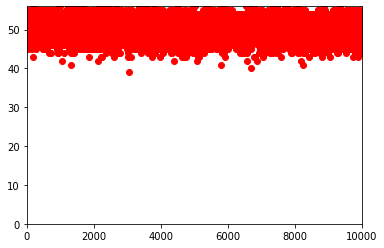

In [31]:
import matplotlib.pyplot as plt
plt.plot(coming, 'ro')
plt.axis([0, iterations, 0, seats])
plt.show()

In [ ]:
iterations = 10000             # Number of iterations to run simulation 

p = 0.1                        # probability of people not showing up
seats = np.arange(50,70,1)    # different extra number of seats to be booked [50, 51, ..., 70]

for s in seats:               # for each of the different seats numbers
    success = np.mean(np.random.binomial(s, (1-p), iterations))
    print (success)

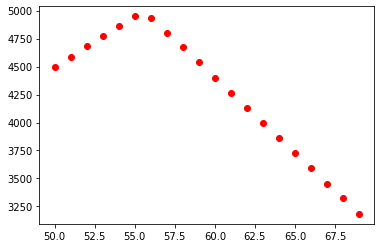

In [33]:
iterations = 10000             # Number of iterations to run simulation 

p = 0.1                        # probability of people not showing up
seats = np.arange(50,70,1)     # different extra number of seats to be booked [50, 51, ..., 70]
all_profits = []

for s in seats:                # for each of the different seats numbers
    success = np.mean(np.random.binomial(s, (1-p), iterations))
    revenue = success * 100
    cost = (success - 50)*250
    if cost > 0:
        profit = revenue - cost
    else:
        profit = revenue
    all_profits.append([profit])
    
plt.plot(seats, all_profits, 'ro')

# Simulated data

Scores on a certain test, Test A, are normally distributed with mean $\mu=100$ and variance $\sigma^2 = 225$. The standard normal density is: 
$$\phi(x) = \frac{1}{\sqrt{2\pi}}\exp(-x^2/2).$$

In [ ]:
## simulation using the standard normal density
import numpy as np
np.random.seed(10)                     # set random number seed
mu = 100                               # mean of distribution
sigma = 15                             # standard deviation of distribution
x = mu + sigma * np.random.randn(500)  # randn is standard normal
x[:4]                                  # show first 4 observations

In [ ]:
plt.figure()   # create new figure
plt.hist(x)    # create histogram
plt.show()     # show the plot

In [ ]:
np.random.seed(10)
y = np.random.normal(100,15,500)
y[0:4]

In [ ]:
plt.figure()   # create new figure
plt.hist(y)    # create histogram
plt.show()     # show the plot